In [89]:
require(data.table)
require(dada2)
require(phyloseq)
require(ggplot2)

In [110]:
meta=fread("~/Documents/DE_16S/DE16S_allmeta.csv")
asv_all=fread("~/Documents/DE_16S/ASVs/Run123_ASV_nochim.csv")
taxa=read.csv("~/Documents/DE_16S/ASVs/Run123_taxa.csv", header=TRUE, row.names=1)

In [111]:
rows=as.vector(asv_all[,1])
asv_all=asv_all[,-1]
asv_all=apply(asv_all, 2, as.numeric)
row.names(asv_all)=rows$V1

In [112]:
#negative controls 
negs=meta[meta$Experiment=="Negative",]
negcounts=asv_all[row.names(asv_all) %in% negs$UniqueID,]
remove=negcounts[,colSums(negcounts)>0]
asv_all=asv_all[,!colnames(asv_all) %in% colnames(remove)]

In [135]:
#pull out the riverkeeper samples
meta_r=as.data.frame(meta[meta$Experiment=="Riverkeeper",])
row.names(meta_r)=meta_r$UniqueID
asv_r=asv_all[rownames(asv_all) %in% meta_r$UniqueID,]


In [136]:
#remove samples that have fewer than 500 sequences
asv_r=asv_r[rowSums(asv_r)>500,]

In [137]:
asv_r=asv_r[,colSums(asv_r)>0]

In [138]:
meta_r=meta_r[meta_r$UniqueID %in% rownames(asv_r),]

In [212]:
rownames(asv_r)

[1] "2019____HHH_1A_BAC" "2019____HHH_2A_BAC" "2019____HHH_3A_BAC"
 [4] "2019____PDM_1A_BAC" "2019____RC_1A_BAC"  "2019____RC_2A_BAC" 
 [7] "2019____RC_3A_BAC"  "2019____RRM_1A_BAC" "2019____RRM_2A_BAC"
[10] "2019____RRM_3A_BAC"

In [213]:
meta_r

,V1,UniqueID,Experiment,Year,Site,Treatment1_Density,Treatment2_Diversity,Color_Bucket,Number,Species,RFTM_score,peacrabs,Phase_1_DO,Phase_1_temp,Phase_2_DO,Phase_2_Temp,Overall_treatment
,<int>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>
2019____HHH_1A_BAC,234,2019____HHH_1A_BAC,Riverkeeper,2019,Holly_hill_harbor,High,,,HHH_1A,BAC,NA,NA,,,,,
2019____HHH_2A_BAC,235,2019____HHH_2A_BAC,Riverkeeper,2019,Holly_hill_harbor,High,,,HHH_2A,BAC,NA,NA,,,,,
2019____HHH_3A_BAC,236,2019____HHH_3A_BAC,Riverkeeper,2019,Holly_hill_harbor,High,,,HHH_3A,BAC,NA,NA,,,,,
2019____RRM_1A_BAC,237,2019____RRM_1A_BAC,Riverkeeper,2019,Rhode_river_marina,Control,,,RRM_1A,BAC,NA,NA,,,,,
2019____RRM_2A_BAC,238,2019____RRM_2A_BAC,Riverkeeper,2019,Rhode_river_marina,Control,,,RRM_2A,BAC,NA,NA,,,,,
2019____RRM_3A_BAC,239,2019____RRM_3A_BAC,Riverkeeper,2019,Rhode_river_marina,Control,,,RRM_3A,BAC,NA,NA,,,,,
2019____RC_1A_BAC,240,2019____RC_1A_BAC,Riverkeeper,2019,Rockhold_creek,High,,,RC_1A,BAC,NA,NA,,,,,
2019____RC_2A_BAC,241,2019____RC_2A_BAC,Riverkeeper,2019,Rockhold_creek,High,,,RC_2A,BAC,NA,NA,,,,,
2019____RC_3A_BAC,242,2019____RC_3A_BAC,Riverkeeper,2019,Rockhold_creek,High,,,RC_3A,BAC,NA,NA,,,,,


In [146]:
#Pull out river taxa
taxa_r=taxa[rownames(taxa)%in% colnames(asv_r),]
taxa_r=as.matrix(taxa_r)

In [147]:
#Make phyloseq parts
OTU = otu_table(t(asv_r), taxa_are_rows = TRUE)
TAX = tax_table(taxa_r)
Samp= sample_data(meta_r)

In [148]:
#transform to relative abundance
OTU=transform_sample_counts(OTU, function(x) 1E6 * x/sum(x))

In [149]:
#put together into one phyloseq object
River=phyloseq(OTU, TAX, Samp)

In [150]:
#ordinate bray-curtis dissimilarity
River.ord <- ordinate(River, "NMDS", "bray", trymax=500)

Square root transformation
Wisconsin double standardization
Run 0 stress 0.00300228 
Run 1 stress 0.0006049512 
... New best solution
... Procrustes: rmse 0.1104856  max resid 0.1719236 
Run 2 stress 0.0004807586 
... New best solution
... Procrustes: rmse 0.02076577  max resid 0.04078253 
Run 3 stress 0.3332451 
Run 4 stress 0.002673206 
Run 5 stress 0.002997491 
Run 6 stress 0.002929897 
Run 7 stress 0.002636862 
Run 8 stress 0.0005243866 
... Procrustes: rmse 0.02072781  max resid 0.04109883 
Run 9 stress 0.0001207938 
... New best solution
... Procrustes: rmse 0.04403166  max resid 0.1257879 
Run 10 stress 0.0006640607 
Run 11 stress 0.001179585 
Run 12 stress 0.08799388 
Run 13 stress 0.0001447139 
... Procrustes: rmse 0.05196732  max resid 0.09019797 
Run 14 stress 0.08799388 
Run 15 stress 9.959788e-05 
... New best solution
... Procrustes: rmse 0.04755444  max resid 0.08099936 
Run 16 stress 0.0004482378 
... Procrustes: rmse 0.07635891  max resid 0.1370316 
Run 17 stress 0.000

Warning message in metaMDS(veganifyOTU(physeq), distance, ...):
“stress is (nearly) zero: you may have insufficient data”


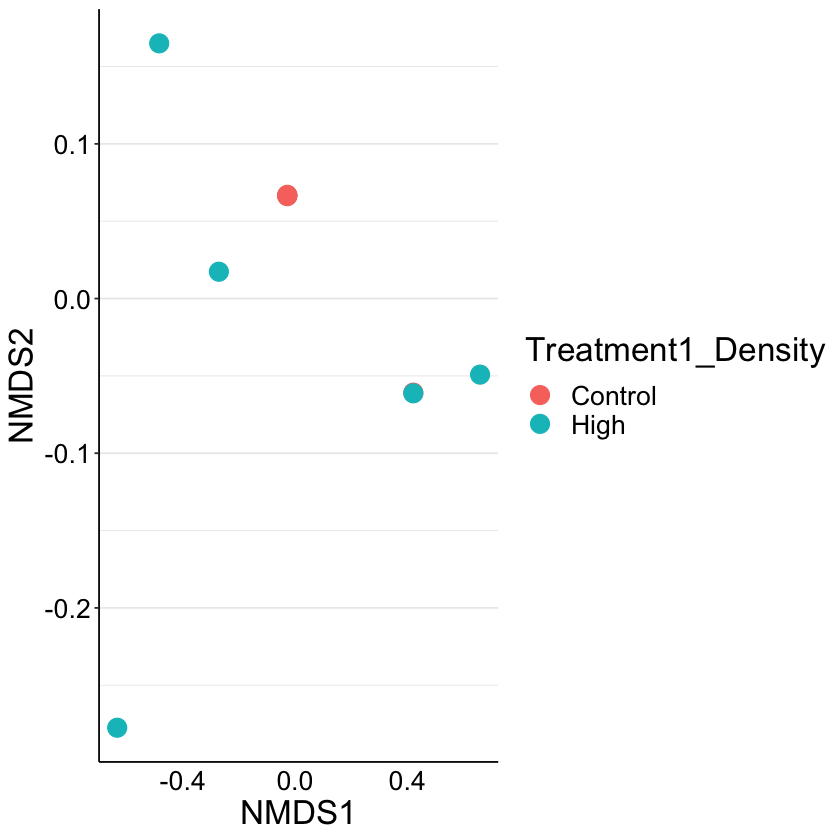

In [151]:
plot_ordination(River, River.ord, type="samples", color="Treatment1_Density")+ 
geom_point(size=5)+
theme_bw()+
 theme(legend.position="right", panel.border = element_blank(), 
          panel.grid.major.x = element_blank(), 
          panel.grid.minor.x = element_blank(),
          axis.ticks.x=element_blank(), axis.line=element_line(color="black"), axis.text=element_text(color="black"),
          text = element_text(size=20))

In [152]:
#ordinate jaccard dissimilarity
River.jord <- ordinate(River, "NMDS", "jaccard", trymax=500)

Square root transformation
Wisconsin double standardization
Run 0 stress 0.002783084 
Run 1 stress 0.0002289106 
... New best solution
... Procrustes: rmse 0.05282564  max resid 0.08518831 
Run 2 stress 0.0007202763 
... Procrustes: rmse 0.06687129  max resid 0.1246662 
Run 3 stress 0.003155659 
Run 4 stress 0.0002705498 
... Procrustes: rmse 0.065749  max resid 0.1265481 
Run 5 stress 0.006293438 
Run 6 stress 8.792983e-05 
... New best solution
... Procrustes: rmse 0.01666721  max resid 0.04147399 
Run 7 stress 0.228363 
Run 8 stress 0.002974456 
Run 9 stress 0.0003418564 
... Procrustes: rmse 0.06106688  max resid 0.1242787 
Run 10 stress 0.0879503 
Run 11 stress 0.08795036 
Run 12 stress 0.0003324147 
... Procrustes: rmse 0.0332297  max resid 0.05337925 
Run 13 stress 0.0003150255 
... Procrustes: rmse 0.0610841  max resid 0.1240969 
Run 14 stress 0.002757148 
Run 15 stress 9.924321e-05 
... Procrustes: rmse 0.09166035  max resid 0.1872278 
Run 16 stress 9.928829e-05 
... Procruste

Run 159 stress 0.0001551696 
... Procrustes: rmse 0.0511684  max resid 0.1011042 
Run 160 stress 0.08795031 
Run 161 stress 0.1736212 
Run 162 stress 0.0004411947 
... Procrustes: rmse 0.09781072  max resid 0.1879701 
Run 163 stress 0.002798976 
Run 164 stress 0.228363 
Run 165 stress 9.962181e-05 
... Procrustes: rmse 0.03238529  max resid 0.06298381 
Run 166 stress 0.0004795583 
... Procrustes: rmse 0.0608447  max resid 0.1256469 
Run 167 stress 0.2010911 
Run 168 stress 0.0001131899 
... Procrustes: rmse 0.08577622  max resid 0.1612501 
Run 169 stress 0.08799388 
Run 170 stress 0.2677218 
Run 171 stress 0.002758606 
Run 172 stress 0.0029855 
Run 173 stress 0.003156952 
Run 174 stress 0.0001854214 
... Procrustes: rmse 0.05175466  max resid 0.1020614 
Run 175 stress 0.08795031 
Run 176 stress 0.0006591087 
Run 177 stress 0.0002638097 
... Procrustes: rmse 0.08422393  max resid 0.1574694 
Run 178 stress 0.0004393111 
... Procrustes: rmse 0.06062516  max resid 0.1252158 
Run 179 stress

Run 321 stress 0.1736212 
Run 322 stress 0.002000049 
Run 323 stress 0.002966219 
Run 324 stress 9.897399e-05 
... Procrustes: rmse 0.07759467  max resid 0.1764231 
Run 325 stress 0.3332462 
Run 326 stress 0.0003209274 
... Procrustes: rmse 0.08639067  max resid 0.1681651 
Run 327 stress 0.2010911 
Run 328 stress 0.0004863753 
... Procrustes: rmse 0.07789298  max resid 0.165732 
Run 329 stress 0.228363 
Run 330 stress 0.0001525775 
... Procrustes: rmse 0.05954184  max resid 0.1248216 
Run 331 stress 9.863173e-05 
... Procrustes: rmse 0.1001179  max resid 0.1931192 
Run 332 stress 0.0005651161 
... Procrustes: rmse 0.07116045  max resid 0.1768584 
Run 333 stress 0.08799388 
Run 334 stress 0.002767007 
Run 335 stress 0.003106838 
Run 336 stress 0.0002327939 
... Procrustes: rmse 0.08527054  max resid 0.1687181 
Run 337 stress 0.2010519 
Run 338 stress 0.0002846409 
... Procrustes: rmse 0.08509349  max resid 0.1636222 
Run 339 stress 0.0004674254 
... Procrustes: rmse 0.06029497  max resi

Warning message in metaMDS(veganifyOTU(physeq), distance, ...):
“stress is (nearly) zero: you may have insufficient data”


In [154]:
River

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 1220 taxa and 10 samples ]
sample_data() Sample Data:       [ 10 samples by 17 sample variables ]
tax_table()   Taxonomy Table:    [ 1220 taxa by 6 taxonomic ranks ]

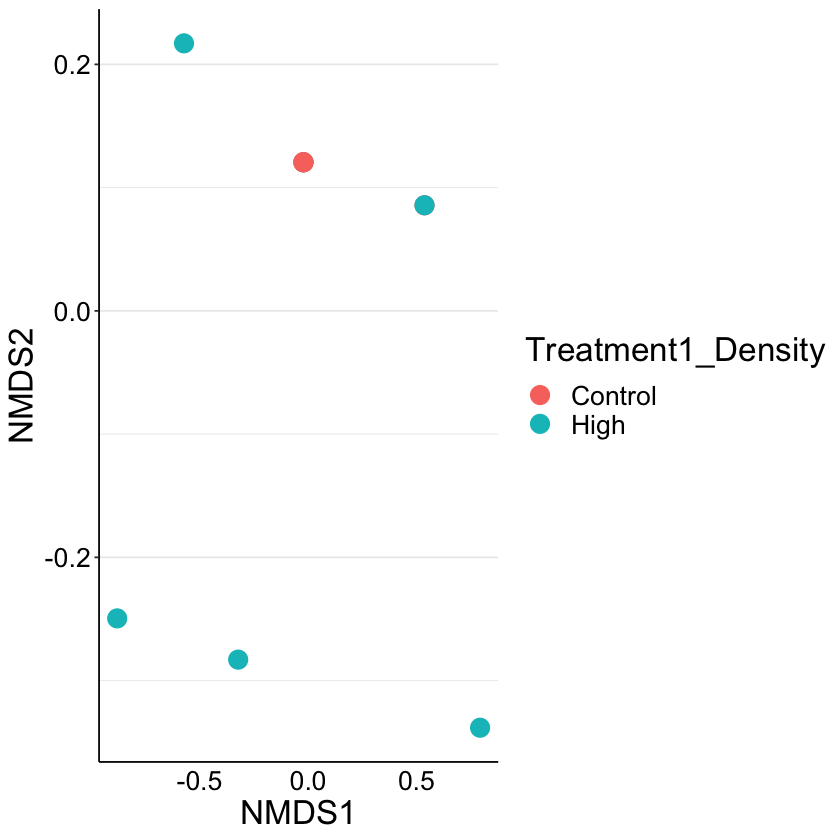

In [164]:
plot_ordination(River, River.jord, type="samples", color="Treatment1_Density")+ 
geom_point(size=5)+

theme_bw()+
 theme(legend.position="right", panel.border = element_blank(), 
          panel.grid.major.x = element_blank(), 
          panel.grid.minor.x = element_blank(),
          axis.ticks.x=element_blank(), axis.line=element_line(color="black"), axis.text=element_text(color="black"),
          text = element_text(size=20))

## Look at top 100 taxa

In [205]:
River_100 = prune_taxa(names(sort(taxa_sums(River),TRUE)[1:100]), River)

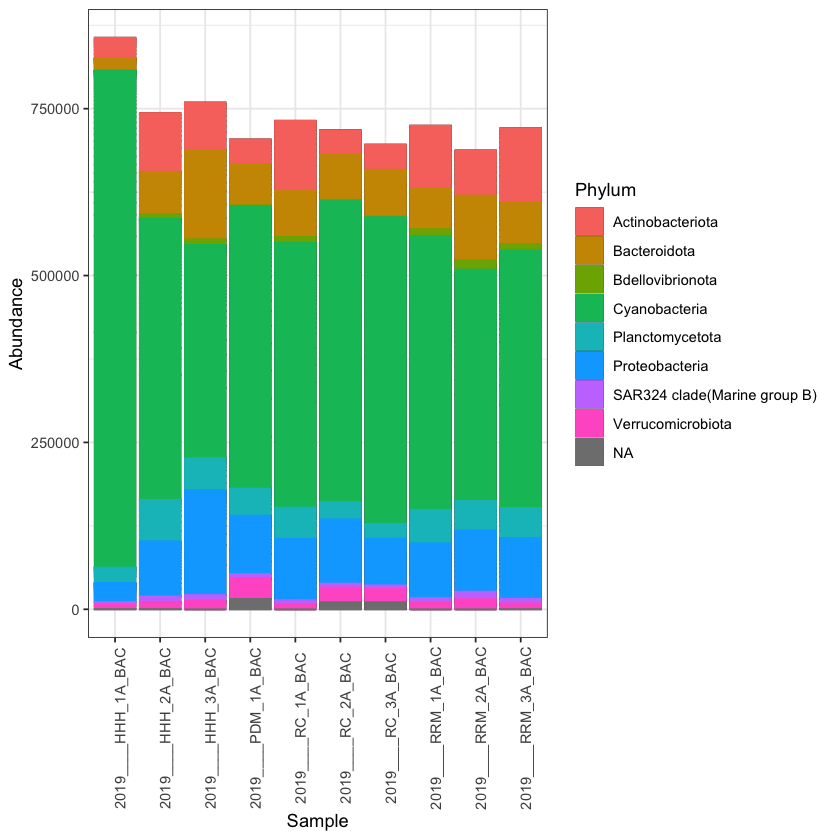

In [207]:
plot_bar(River_100,  fill="Phylum") +
geom_bar(aes(color=Phylum, fill=Phylum), stat="identity", position="stack")+
theme_bw()+
theme(axis.text.x = element_text(angle = 90))

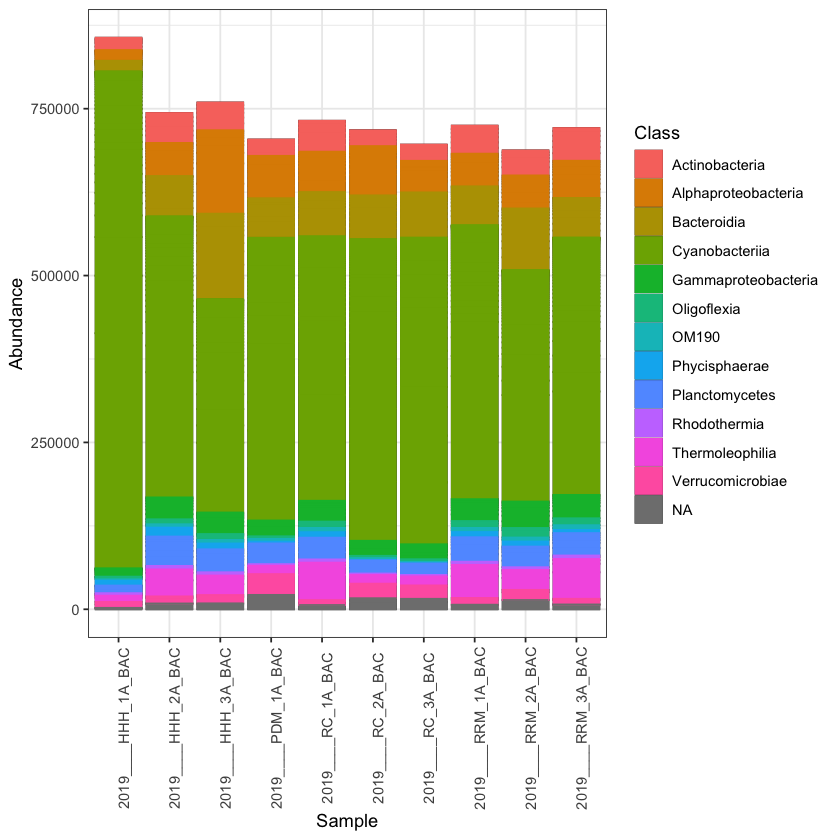

In [208]:
plot_bar(River_100,  fill="Class") +
geom_bar(aes(color=Class, fill=Class), stat="identity", position="stack")+
theme_bw()+
theme(axis.text.x = element_text(angle = 90))

## Pull out cyanos

Warning message:
“Transformation introduced infinite values in discrete y-axis”


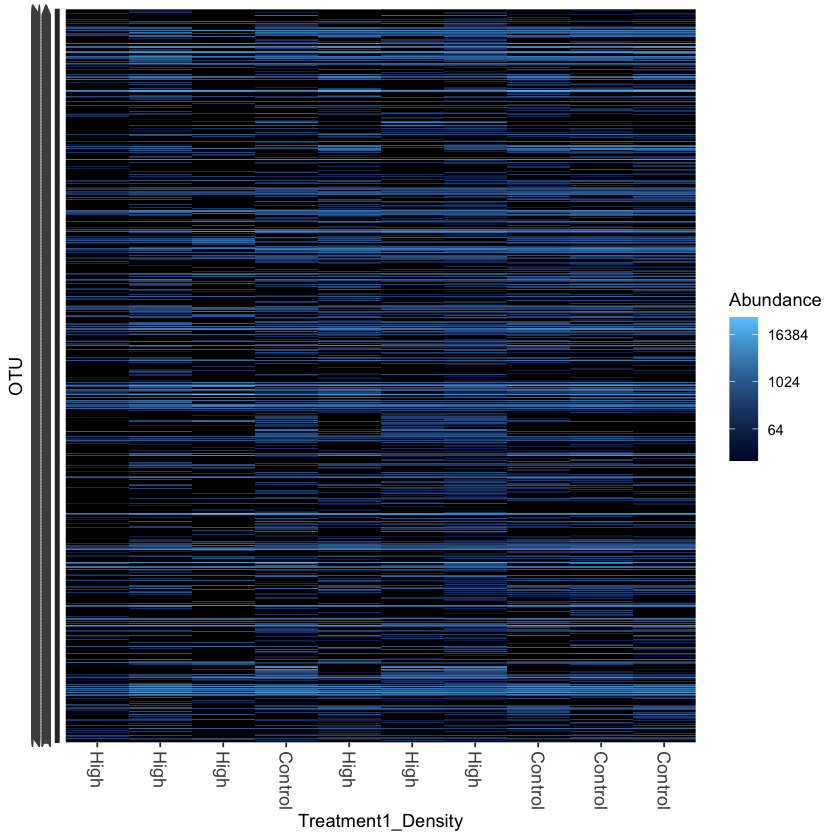

In [169]:
River_nocyano = subset_taxa(River, Phylum!="Cyanobacteria")
plot_heatmap(River_nocyano, method=NULL, distance=NULL, "Treatment1_Density", "Order")

In [226]:
River_pelagi = subset_taxa(River, Phylum="Alphaproteobacteria")
#plot_heatmap(River_pelagi, method=NULL, distance=NULL, "Treatment1_Density", "Family")

In [227]:
tax_table(River_pelagi)

,Kingdom,Phylum,Class,Order,Family,Genus
TACGGGAGTGGCAAGCGTTATCCGGAATTATTGGGCGTAAAGCGTCCGCAGGCGGTCTTGTAAGTCTGTTGTTAAAGCGTGGAGCTTAACTCCATTTCAGCAATGGAAACTGTAAGACTAGAGTGTGGTAGGGGCAGAGGGAATTCCCGGTGTAGCGGTGAAATGCGTAGATATCGGGAAGAACACCAGTGGCGAAGGCGCTCTGCTGGGCCATAACTGACGCTCATGGACGAAAGCCAGGGGAGCGAAAGGG,Bacteria,Cyanobacteria,Cyanobacteriia,Synechococcales,Cyanobiaceae,Cyanobium PCC-6307
TACAGAGGTCTCAAGCGTTGTTCGGATTCATTGGGCGTAAAGGGTGCGTAGGTGGCGATGTAAGTCGGGTGTGAAATCTCCAAGCTTAACTTGGAAACTGCACTCGATACTGCGTCGCTCGAGGACTGTAGAGGGCATTGGAATTCACGGTGTAGCAGTGAAATGCGTAGATATCGTGAGGAAGACCAGTGGCGAAGGCGAATGCCTGGGCAGTTCCTGACACTGAGGCACGAAGGCCAGGGGAGCAAACGGG,Bacteria,Verrucomicrobiota,Verrucomicrobiae,Chthoniobacterales,Chthoniobacteraceae,LD29
GACGGAGGATGCAAGTGTTATCCGGAATCACTGGGCGTAAAGCGTCTGTAGGTGGTTTGATAAGTCAACTGTTAAATCTTGAGGCTCAACTTCAAAATCGCAGTCGAAACTATTAGACTAGAGTATAGTAGAGGTAAAGGGAATTTCCAGTGGAGCGGTGAAATGCGTAGATATTGGAAAGAACACCGATGGCGAAAGCACTTTACTGGGCTATTACTAACACTCAGAGACGAAAGCTAGGGTAGCAAATGGG,Bacteria,Cyanobacteria,Cyanobacteriia,Chloroplast,NA,NA
GACGAACCGTACAAACGTTACTCGGAATTACTGGGCTTAAAGGGTGCGTAGGCTGCGCGGAAAGTTGGGTGTGAAAGCCCTCGGCTCAACCGAGGAATTGCATCCAAAACTACCGTGCTGGAGGGAGACAGAGGTAAGCGGAACTCAAGGTGGAGCGGTGAAATGCGTTGATATCTTGAGGAACACCGGTGGCGAAAGCGGCTTACTGGGTCTCTTCTGACGCTGAGGCACGAAAGCTAAGGTAGCAAACGGG,Bacteria,Planctomycetota,Planctomycetes,Pirellulales,Pirellulaceae,NA
GACGGAGGATGCAAGTGTTATCCGGAATCACTGGGCGTAAAGCGTCTGTAGGTGGTTTAATAAGTCAACTGTTAAATCTTGAGGCTCAACTTCAAAATCGCAGTCGAAACTATTAGACTAGAGTATAGTAGAGGTAAAGGGAATTTCCAGTGGAGCGGTGAAATGCGTAGAGATTGGAAAGAACACCGATGGCGAAAGCACTTTACTGGGCTATTACTAACACTCAGAGACGAAAGCTAGGGTAGCAAATGGG,Bacteria,Cyanobacteria,Cyanobacteriia,Chloroplast,NA,NA
TACGGGAGTGGCAAGCGTTATCCGGAATTATTGGGCGTAAAGCGTCCGCAGGCGGCCTTTTAAGTCTGTTGTTAAAGCGTGGAGCTTAACTCCATTTCAGCAATGGAAACTGGAAGGCTTGAGTGTGGTAGGGGCAGAGGGAATTCCCGGTGTAGCGGTGAAATGCGTAGATATCGGGAAGAACACCAGTGGCGAAGGCGCTCTGCTGGGCCATAACTGACGCTCATGGACGAAAGCCAGGGGAGCGAAAGGG,Bacteria,Cyanobacteria,Cyanobacteriia,Synechococcales,Cyanobiaceae,Cyanobium PCC-6307
GACGGGGGATGCAAGTGTTATCCGGATTTACTGGGCGTAAAGCGTCTGCAGGTGGTTTCTTAAGTCTACTGTTAAATCTTGAGGCTCAACCTCAAATCTGCAGTAGAAACTAGGAGACTTGAGTATAGTAGGGGTAGAGGGAATTTCCAGTGGAGCGGTGAAATGCGTAGATATTGGAAAGAACACCGATGGCGAAGGCACTCTACTGGGCTATTACTGACACTCAGAGACGAAAGCTAGGGGAGCAAATGGG,Bacteria,Cyanobacteria,Cyanobacteriia,Chloroplast,NA,NA
TACGGGAGTGGCAAGCGTTATCCGGAATTATTGGGCGTAAAGCGTCCGCAGGCGGTCTTGTAAGTCTGTTGTTAAAGCGTGGAGCTTAACTCCATTTCAGCAATGGAAACTGCAAGACTAGAGTGTGGTAGGGGCAGAGGGAATTCCCGGTGTAGCGGTGAAATGCGTAGATATCGGGAAGAACACCAGTGGCGAAGGCGCTCTGCTGGGCCATAACTGACGCTCATGGACGAAAGCCAGGGGAGCGAAAGGG,Bacteria,Cyanobacteria,Cyanobacteriia,Synechococcales,Cyanobiaceae,Cyanobium PCC-6307
GACGGAGGATGCAAGCGTTATCCGGAATTATTGGGCGTAAAGCGTCTGTAGGTGGTTTACTCAGTCCGCTGTGAAAGATCAGGGCTTCACCCTGAGCACGCGGTGGAAACCGGTAGACTTGAGTACGGTAGGGGCAGAGGGAATTCCCGGTGGAGCGGTGAAATGCGTAGAGATCGGGAAGAACACCAATGGCGAAGGCACTCTGCTGGGCCGTAACTGACACTGAGAGACGAAAGCTAGGGGAGCAAATGGG,Bacteria,Cyanobacteria,Cyanobacteriia,Chloroplast,NA,NA
TACGGAGGGTGCAAGCGTTACTCGGAATCACTGGGCGTAAAGAGCGTGTAGGCGGGTAAATAAGTCAGAAGTGAAATCCAATAGCTCAACTATTGAACTGCTTTTGAAACTGTATACCTAGAATGTGGGAGAGGCAGATGGAATTTCTGGTGTAGGGGTAAAATCCGTAGAGATCAGAAGGAATACCGATTGCGAAGGCGATCTGCTGGAACATTATTGACGCTGAGACGCGAAAGCGTGGGGAGCAAACAGG,Bacteria,Campilobacterota,Campylobacteria,Campylobacterales,Arcobacteraceae,NA


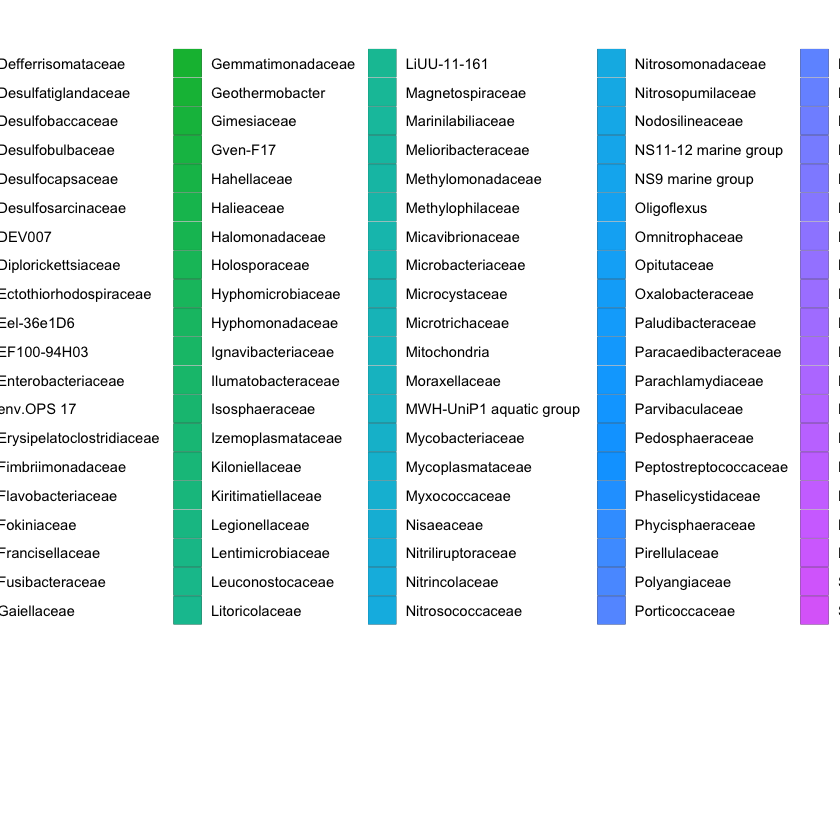

In [219]:
plot_bar(River_pelagi,  fill="Family") +
geom_bar(aes(color=Family, fill=Family), stat="identity", position="stack")+
theme_bw()+
theme(axis.text.x = element_text(angle = 90))


In [170]:
River_bac100 = prune_taxa(names(sort(taxa_sums(River_nocyano),TRUE)[1:100]), River_nocyano)

Warning message:
“Transformation introduced infinite values in discrete y-axis”


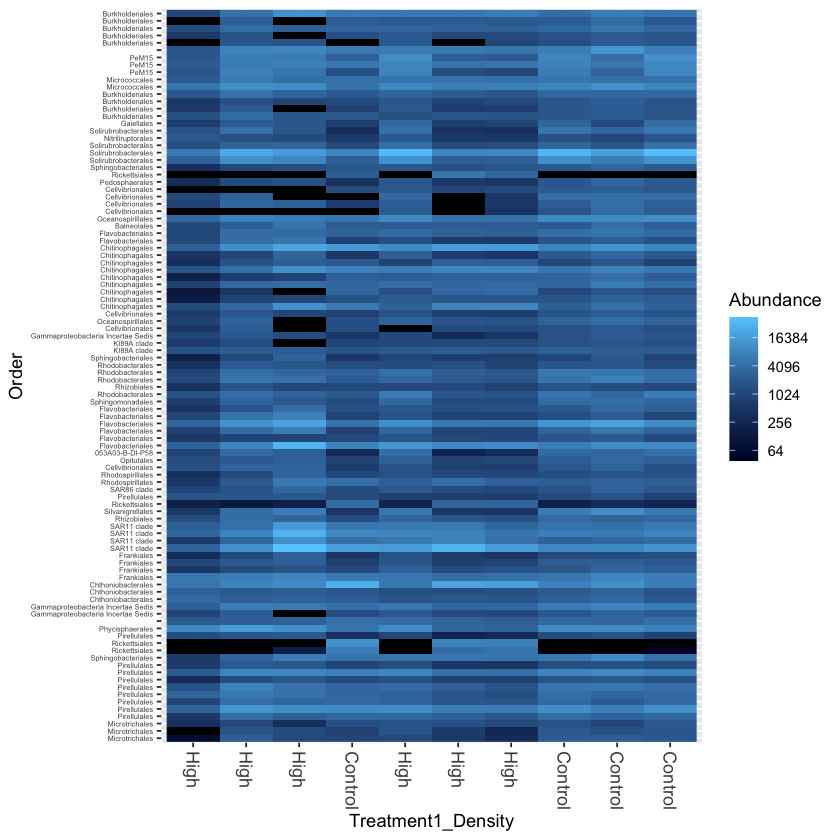

In [171]:
plot_heatmap(River_bac100, method=NULL, distance=NULL, "Treatment1_Density", "Order")

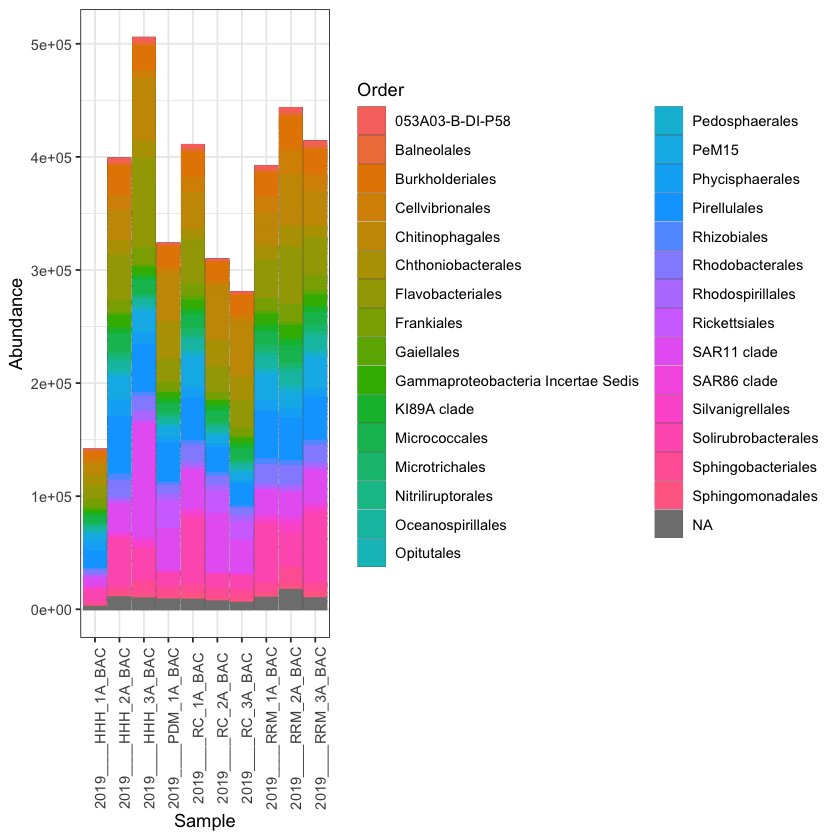

In [209]:
plot_bar(River_bac100,  fill="Order") +
geom_bar(aes(color=Order, fill=Order), stat="identity", position="stack")+
theme_bw()+
theme(axis.text.x = element_text(angle = 90))


Warning message:
“Transformation introduced infinite values in discrete y-axis”


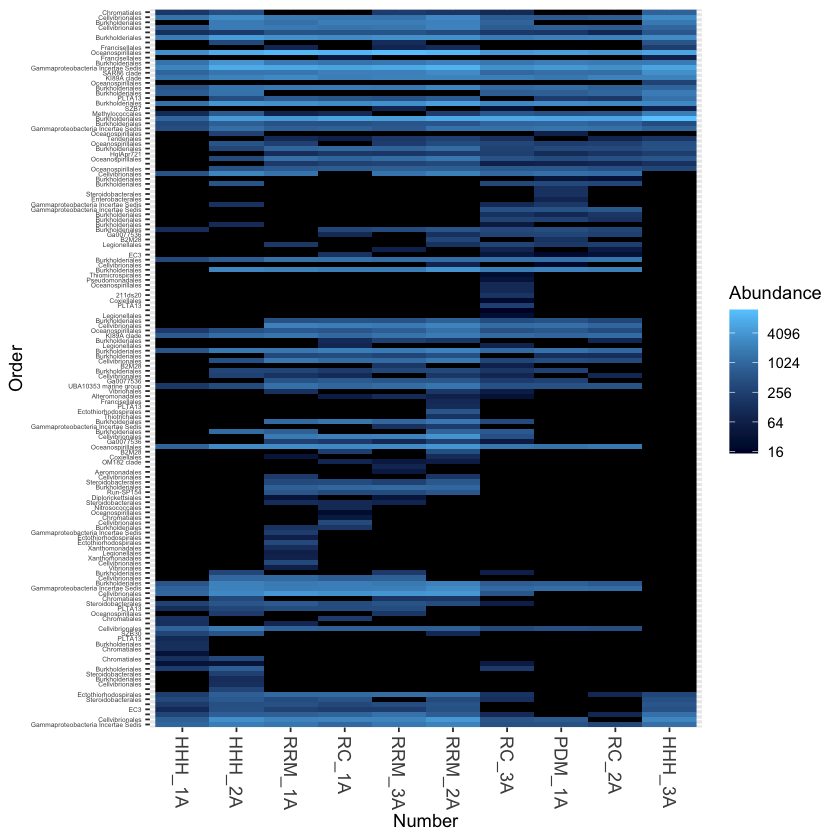

In [210]:
River_Gamma = subset_taxa(River, Class=="Gammaproteobacteria")
plot_heatmap(River_Gamma, "NMDS", "bray", "Number", "Order")

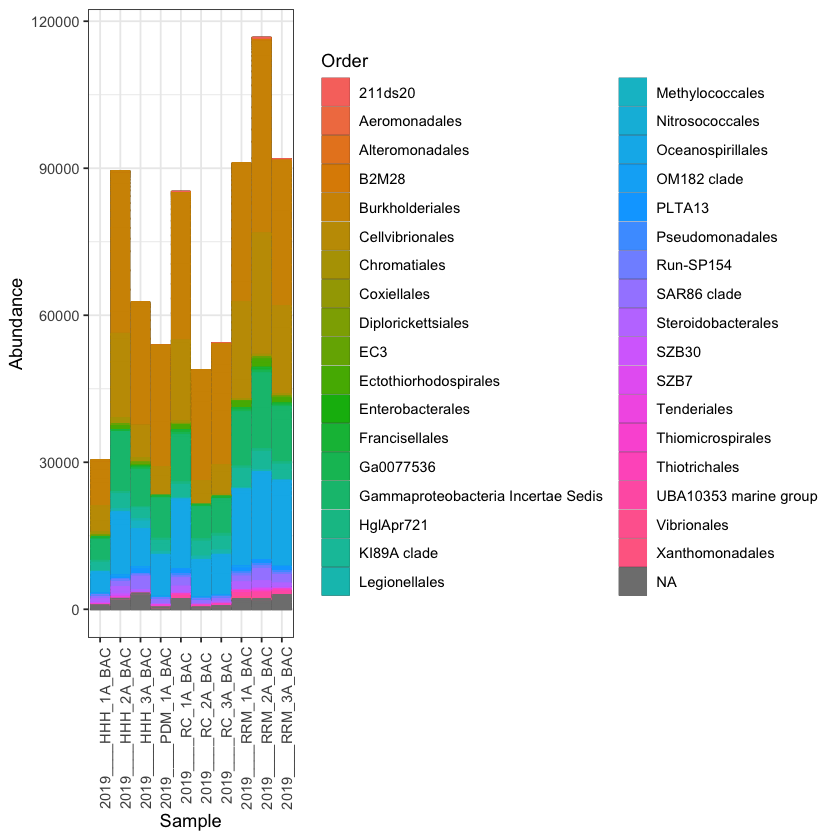

In [214]:
plot_bar(River_Gamma,  fill="Order") +
geom_bar(aes(color=Order, fill=Order), stat="identity", position="stack")+
theme_bw()+
theme(axis.text.x = element_text(angle = 90))


In [196]:
River_Entero = subset_taxa(River, Order=="Enterobacterales")

In [197]:
River_Entero

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 1 taxa and 10 samples ]
sample_data() Sample Data:       [ 10 samples by 17 sample variables ]
tax_table()   Taxonomy Table:    [ 1 taxa by 6 taxonomic ranks ]

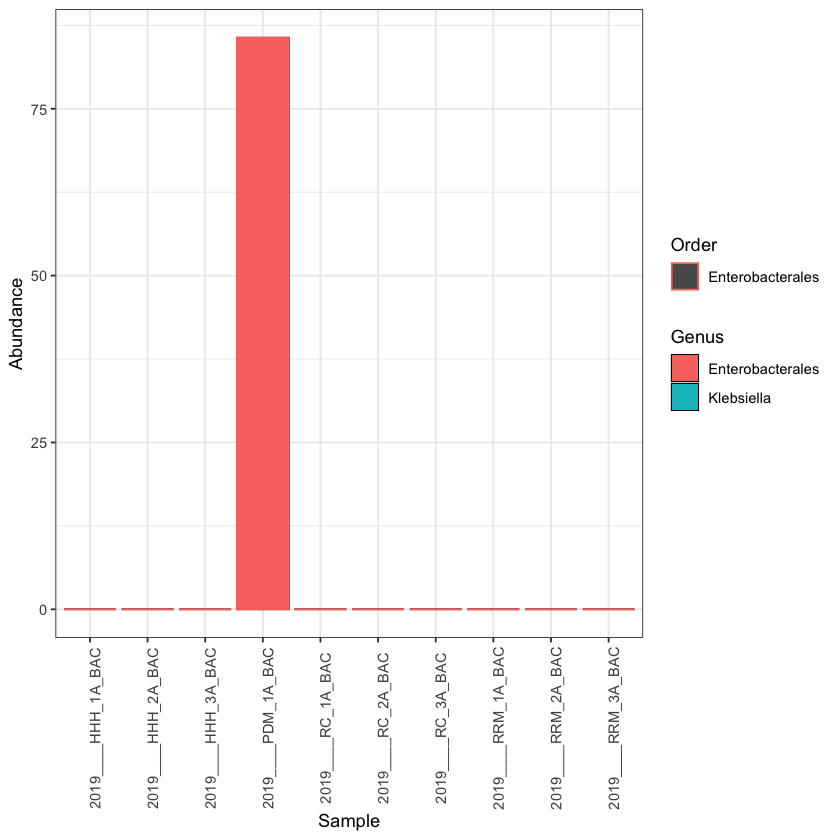

In [198]:
plot_bar(River_Entero,  fill="Genus") +
geom_bar(aes(color=Order, fill=Order), stat="identity", position="stack")+
theme_bw()+
theme(axis.text.x = element_text(angle = 90))


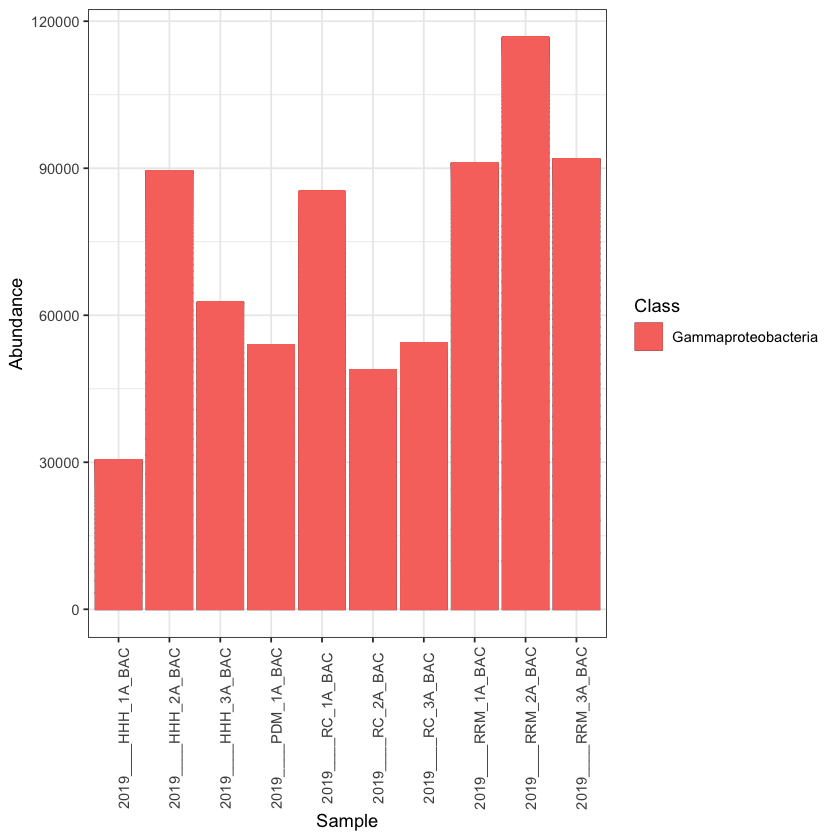

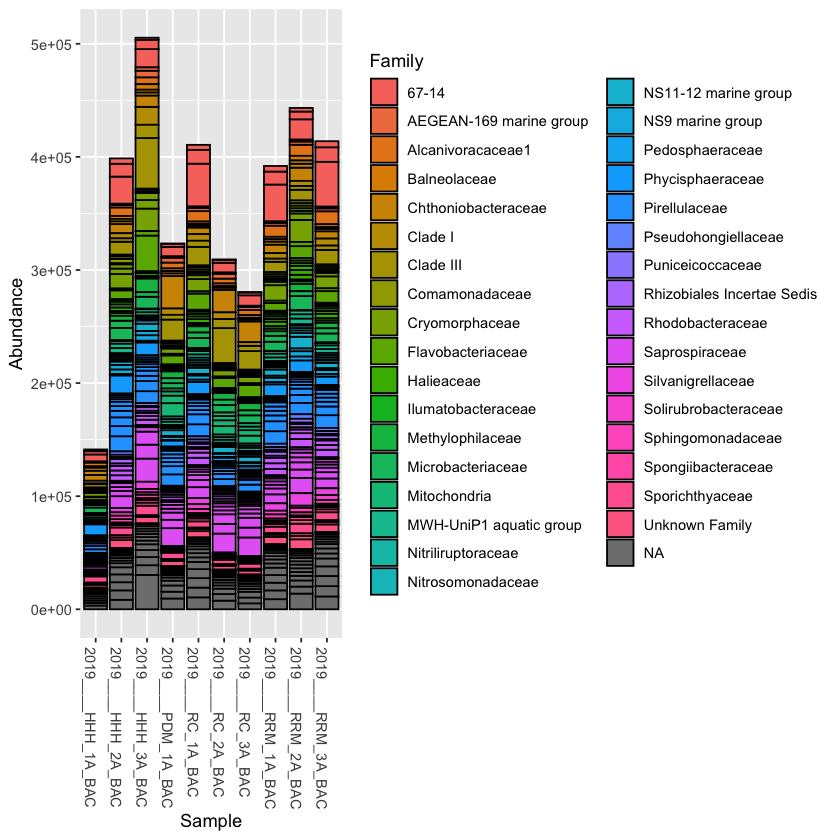

In [53]:
River

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 1228 taxa and 10 samples ]
sample_data() Sample Data:       [ 10 samples by 17 sample variables ]
tax_table()   Taxonomy Table:    [ 1228 taxa by 6 taxonomic ranks ]

Square root transformation
Wisconsin double standardization
Run 0 stress 0.00300228 
Run 1 stress 0.0879503 
Run 2 stress 0.002503533 
... New best solution
... Procrustes: rmse 0.1048918  max resid 0.1799708 
Run 3 stress 0.003160617 
Run 4 stress 0.2106397 
Run 5 stress 0.08799388 
Run 6 stress 0.0007113791 
... New best solution
... Procrustes: rmse 0.04693749  max resid 0.1354366 
Run 7 stress 0.002566666 
Run 8 stress 0.00305072 
Run 9 stress 0.08795033 
Run 10 stress 0.002869026 
Run 11 stress 0.0003643608 
... New best solution
... Procrustes: rmse 0.0117378  max resid 0.02281721 
Run 12 stress 0.08799388 
Run 13 stress 0.0001264442 
... New best solution
... Procrustes: rmse 0.04695409  max resid 0.1063038 
Run 14 stress 0.0005549486 
... Procrustes: rmse 0.003959893  max resid 0.009733717 
... Similar to previous best
Run 15 stress 8.698533e-05 
... New best solution
... Procrustes: rmse 0.0655675  max resid 0.1333944 
Run 16 stress 0.228363 
Run 17 stress 0.003079562 
Run 18 

Warning message in metaMDS(veganifyOTU(physeq), distance, ...):
“stress is (nearly) zero: you may have insufficient data”


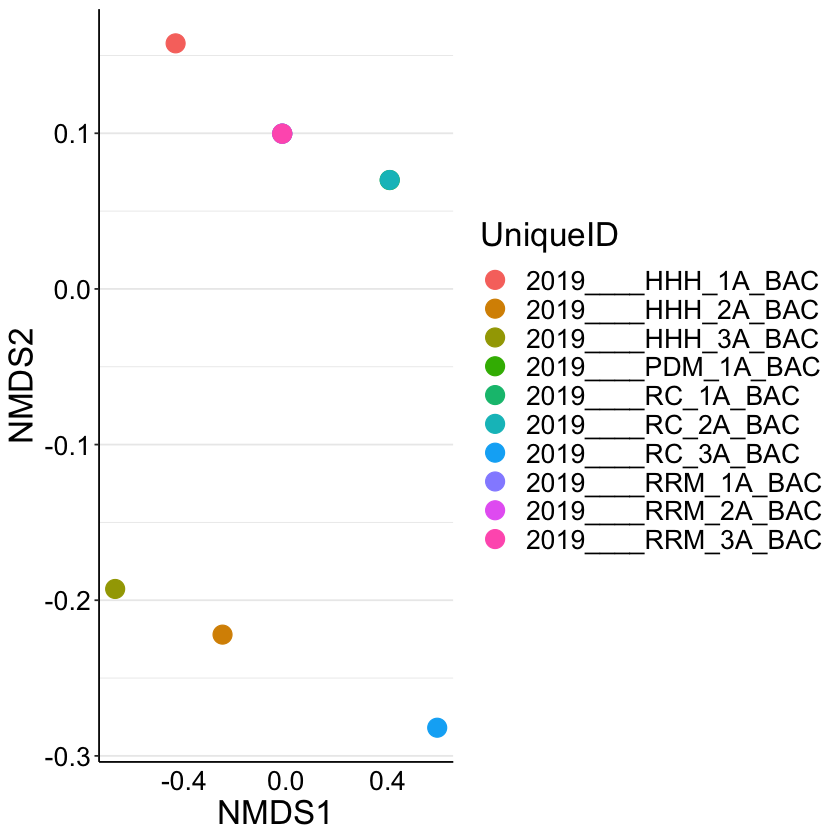